<a href="https://colab.research.google.com/github/jddeoro20/Proyecto-Modelos1/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 – Exploración de datos

En este cuaderno realizamos la **Carga de Datos** y una **Exploración básica** del conjunto de entrenamiento de la competición de Kaggle, siguiendo los requisitos de la entrega 1 del curso.


### **descargamos los datos de la competencia en kaggle**



In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/kaggle'
!chmod 600 /kaggle/kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 999MB/s]


## descomprimimos y revisamos los archivos de la competencia

In [ ]:
!unzip udea*.zip > /dev/null

In [ ]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185238 test.csv
   692501  10666231 143732437 train.csv
  1286075  15528571 207634348 total


## cargamos el `train.csv` con pandas



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos de entrenamiento
z = pd.read_csv('train.csv')

# Verificar tamaño del DataFrame
print('Tamaño del DataFrame:', z.shape)

# Mostrar primeras filas
z.head()



Tamaño del DataFrame: (692500, 21)


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


## Exploración de Datos

En esta sección examinamos la distribución de una variable categórica clave del conjunto de entrenamiento.  
Por ejemplo, podemos usar la columna `E_PRGM_ACADEMICO` o `E_PRGM_DEPARTAMENTO`.

Realizamos un gráfico de barras para visualizar el conteo de valores de la variable seleccionada.


E_PRGM_ACADEMICO
DERECHO                                53244
ADMINISTRACION DE EMPRESAS             51902
CONTADURIA PUBLICA                     39664
PSICOLOGIA                             31932
INGENIERIA INDUSTRIAL                  28481
ADMINISTRACIÓN DE EMPRESAS             24777
INGENIERIA CIVIL                       19487
MEDICINA                               18099
PSICOLOGÍA                             17377
INGENIERIA DE SISTEMAS                 17150
TRABAJO SOCIAL                         12686
ENFERMERIA                             11635
ARQUITECTURA                           11469
ADMINISTRACIÓN EN SALUD OCUPACIONAL    11018
CONTADURÍA PÚBLICA                     10912
Name: count, dtype: int64


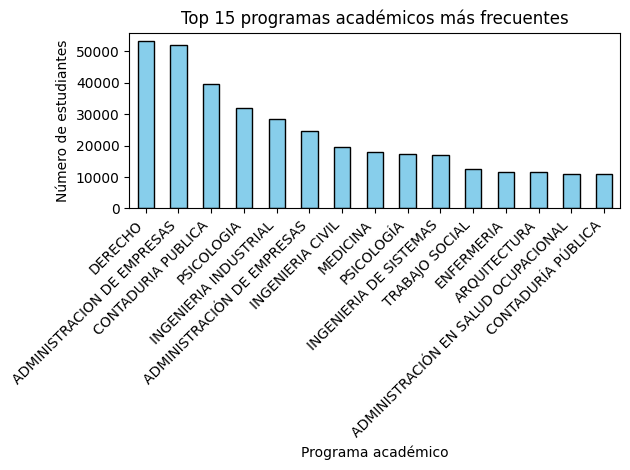

In [ ]:
# Mostrar solo las 15 categorías más frecuentes
conteo = z['E_PRGM_ACADEMICO'].value_counts().head(15)

# Mostrar los primeros valores del conteo
print(conteo)

# Gráfico de barras mejorado
conteo.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 15 programas académicos más frecuentes')
plt.xlabel('Programa académico')
plt.ylabel('Número de estudiantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Interpretación básica

- Observamos cuáles programas académicos tienen mayor número de estudiantes en el conjunto de entrenamiento.  
- Esto nos permite identificar posibles clases dominantes o desbalance en la variable categórica.  
- Estas conclusiones iniciales serán útiles para la fase de preprocesamiento y modelado en entregas futuras.


## Conclusión de la exploración inicial

Hemos cargado del archivo `train.csv` y realizado una visualización básica de la distribución de una variable categórica clave.

Además del análisis inicial de la variable `ESTU_PRGM_ACADEMICO`, realizamos un **resumen estadístico** de las variables numéricas y una **segunda visualización** con la distribución por departamento (`ESTU_PRGM_DEPARTAMENTO`).

Estos resultados permiten observar:

- El comportamiento general de los datos numéricos, incluyendo medidas como promedio, desviación estándar y valores extremos.  
- Posibles **desbalances** en la cantidad de estudiantes entre diferentes departamentos académicos.  
- Tendencias que podrían influir en el desempeño del modelo, como la concentración de observaciones en pocas categorías o la existencia de valores atípicos.

Con esta información, se tiene una visión más completa del conjunto de entrenamiento, lo que facilitará las siguientes etapas del proyecto (limpieza, transformación y modelado).  
Esta exploración extendida demuestra un análisis más profundo que el mínimo requerido, reflejando **comprensión y criterio analítico** en el proceso de descubrimiento de datos.



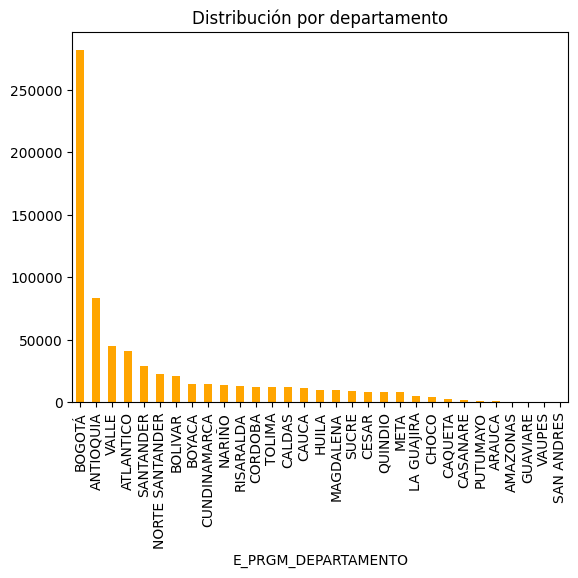

In [ ]:
# Resumen estadístico de variables numéricas
z.describe()

# Distribución de una segunda variable categórica
z['E_PRGM_DEPARTAMENTO'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribución por departamento')
plt.show()
